In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

In [2]:
# define 2 dimension plot function
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [3]:
#import bank data
bankdata = pd.read_csv('bank_new.csv')
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
X_all = bankdata.iloc[:,0:16].values
Y_all = bankdata.iloc[:,-1].values

# select features age, balance and duration
# Transform Y into numbers, yes for 1 and no for -1
X_sample = X_all[:,[0,11]]
Y_sample = np.where(Y_all == 'no', -1,1)

In [5]:
#seperate test data and train data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sample, Y_sample, test_size = 0.3, random_state = 0)

D:\anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# normalize sample data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [7]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

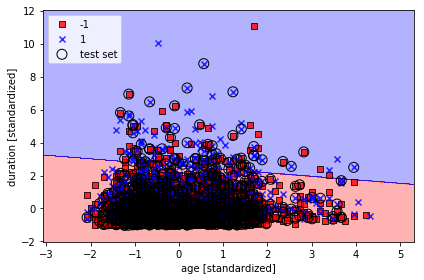

Accuracy: 0.8880


In [8]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000, random_state = 0)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(3164, 4521))
plt.xlabel('age [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

# accuracy of logistic regression
y_pred = lr.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

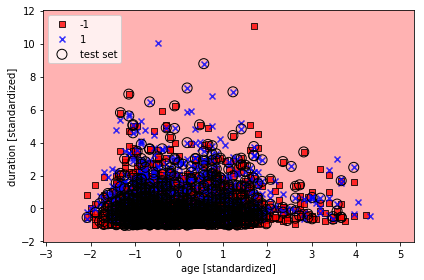

Accuracy: 0.8880


In [9]:
# Support Vector Machine
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(3164, 4521))
plt.xlabel('age [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# accuracy of SVM
y_pred = lr.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

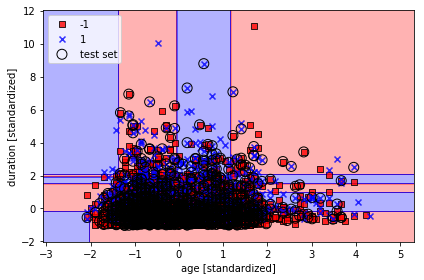

Accuracy: 0.8880


In [10]:
#decision tree model
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train_std, y_train)


plot_decision_regions(X_combined_std, y_combined, 
                      classifier=tree, test_idx=range(3164, 4521))

plt.xlabel('age [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# accuracy of decision tree
y_pred = lr.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

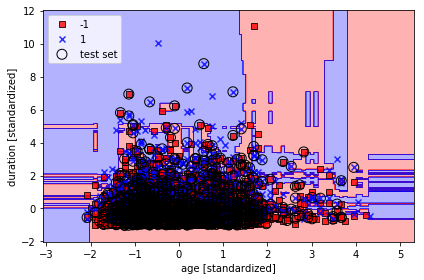

Accuracy: 0.8880


In [11]:
#random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=forest, test_idx=range(3164, 4521))

plt.xlabel('age [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_22.png', dpi=300)
plt.show()

# accuracy of randomforest
y_pred = lr.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

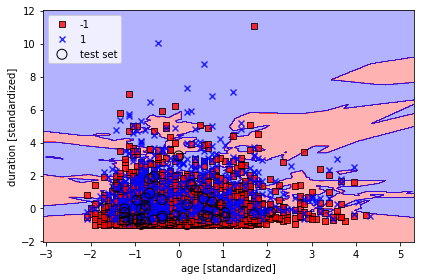

Accuracy: 0.8880


In [12]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('age [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# accuracy of KNN
y_pred = lr.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))